In [1]:
import torch
import torch.nn as nn

import seaborn as sns

In [67]:
log_files = ['/data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-probkd_L2_line84_dfq.txt','/data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-probkd_L2_line76_dfq.txt','/data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-probkd_L2_line77_dfq.txt',  '/data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-probkd_L2_line82_dfq.txt']
!cat /data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-probkd_L2_line77_dfq.txt

[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: method: probkd
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: adv: 0.0
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: adv_type: kl
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: cond: False
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: bn: 1.0
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: oh: 1.0
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: act: 0.001
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: l1: 0.01
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: balance: 0
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: depth: 2
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: no_feature: True
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: only_feature: False
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: save_dir: run/probkd_test
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: no_logits: 1
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: logit_correction: mean
[05/02 09:46:00] cifar10-resnet34-resnet18 INFO: loss: kl
[05

In [68]:
def get_res_dict(file):
    f = open(file).readlines()
    res_dict = {}
    for logs in f:
        lines = logs.strip()
    #     print(lines.split(' ')[3])
        if lines.split(' ')[4] == '[Eval]':
            epoch = int(lines.split(' ')[5].split('=')[-1])
            acc = float(lines.split(' ')[6].split('=')[-1])
            res_dict[epoch] = acc
    return res_dict

In [69]:
import numpy as np
import pandas as pd
res_dicts_currkd = []
dfs = []
for f in log_files:
    res_dict = get_res_dict(f)
    real_res_dict = {'epoch': list(res_dict.keys()), 'acc': list(res_dict.values()), 'method': ['currkd' for _ in range(len(res_dict))]}
    dfa = pd.DataFrame(data=real_res_dict)
    dfs.append(dfa)
    values = list(res_dict.values())
    res_dicts_currkd.append(np.array(values))
#     epochs.append()
df_currkd = pd.concat(dfs)
df_currkd.head()
# all_res = np.array(res_dicts)    

,epoch,acc,method
0,0,12.33,currkd
1,1,51.28,currkd
2,2,71.24,currkd
3,3,78.62,currkd
4,4,80.68,currkd


In [70]:
# print(all_res)
res = []
for i in range(250):
    acc = df_currkd[df_currkd['epoch'] == i]['acc']
    res.append(acc.to_numpy())

means = [np.mean(x) for x in res]
vars = [np.var(x) for x in res]
means = np.asarray(means)
real_mean = np.mean(means[80:])
real_var = np.var(means[80:])
print(real_mean, real_var)
# print(res[0])
# print(all_res[0])
# print(np.mean(all_res[0]))
# eacc_ts = all_res.mean(axis=0)
# eacc_ts_var = all_res.var(axis=0)
# x = np.argmax(eacc_ts[-:] - eacc_ts_var[-3:])
# print(eacc_ts[-3:][x], eacc_ts_var[-3:][x])

94.06223529411766 2.879264121107267


In [53]:
!cat /data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-deepinv.txt

[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: method: deepinv
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: adv: 1.0
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: bn: 10.0
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: oh: 1.0
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: act: 0.0
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: balance: 0.0
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: save_dir: run/deepinv
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: cr: 1
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: cr_T: 0.5
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: cmi_init: None
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: data_root: data
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: teacher: resnet34
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: student: resnet18
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: dataset: cifar10
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: lr: 0.1
[05/10 03:17:34] cifar10-resnet34-resnet18 INFO: lr_decay_milestones: 1

In [64]:
res_dict = get_res_dict('/data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar10-resnet34-resnet18-deepinv.txt')
w = np.asarray(list(res_dict.values())[80:])
print(np.mean(w), np.var(w))

87.16870588235294 13.857617148788929


In [7]:
import pandas as pd
file_lists = [
    '/data/lijingru/CMI/checkpoints/datafree-cmi/log-cifar10-resnet34-resnet18-cmi.txt', 
    '/data/lijingru/CMI/checkpoints/datafree-dafl/log-cifar10-resnet34-resnet18.txt',
    '/data/lijingru/CMI/checkpoints/datafree-deepinv/log-cifar10-resnet34-resnet18-deepinv.txt'
]
methods = ['cmi', 'dafl', 'deepinv']
# currkd_res = all_res[0]
res_dicts = dfs
for f, m in zip(file_lists, methods):
    res_dict = get_res_dict(f)
    real_res_dict = {'epoch': list(res_dict.keys()), 'acc': list(res_dict.values()), 'method': [m for _ in range(len(res_dict))]}
    dfa = pd.DataFrame(data=real_res_dict)
    dfs.append(dfa)
    values = list(res_dict.values())
    print(len(values))

all_dfs = pd.concat(dfs)
all_dfs.head()

250
250
250


,epoch,acc,method
0,0,32.13,currkd
1,1,51.28,currkd
2,2,71.24,currkd
3,3,78.62,currkd
4,4,80.68,currkd


In [7]:
# print(res_dicts)
columns=['currkd', 'cmi', 'dafl', 'deepinv']
res_dict = {}
for c, v in zip(columns, res_dicts):
    res_dict[c] = v
w = pd.DataFrame(data=dict([(k, pd.Series(v)) for k, v in res_dict.items()]))
w.head()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Text(0, 0.5, 'top1-acc(%)')

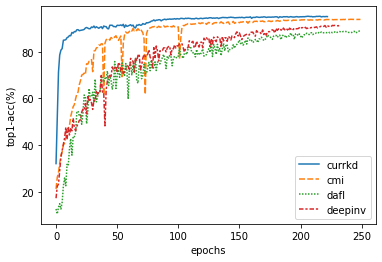

In [32]:
import matplotlib.pyplot as plt
sns.lineplot(data=w)
plt.xlabel('epochs')
plt.ylabel('top1-acc(%)')

<AxesSubplot:xlabel='epoch', ylabel='acc'>

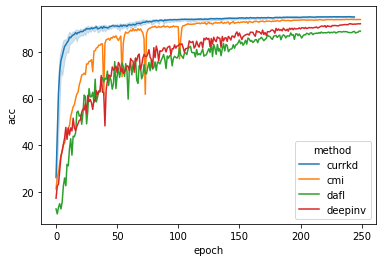

In [8]:
sns.lineplot(data=all_dfs, x='epoch', y='acc', hue='method')

In [15]:
print(np.mean(a), np.var(a))
s = np.array([92.57772,91.22188,91.10260])
print(np.mean(s), np.var(s))

91.10260000000001 57.69851604
91.63406666666667 0.4476120931555571


In [50]:
log_files = [
    '/data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar100-resnet34-resnet18-probkd_L2_line8.txt',
    '/data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar100-resnet34-resnet18-probkd_L2_line16.txt',
    '/data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar100-resnet34-resnet18-probkd_L2_line17.txt',
    '/data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar100-resnet34-resnet18-probkd_L2_line20.txt'
]
methods = ['cmi', 'dafl', 'deepinv']
res_dicts = []
dfs_hun = []
for f, m in zip(log_files, methods):
    res_dict = get_res_dict(f)
    real_res_dict = {'epoch': list(res_dict.keys()), 'acc': list(res_dict.values()), 'method': ['currkd' for _ in range(len(res_dict))]}
    dfa = pd.DataFrame(data=real_res_dict)
    dfs_hun.append(dfa)
    values = list(res_dict.values())
    print(len(values))

df_currkd_hundred = pd.concat(dfs_hun)
df_currkd_hundred.head()

!cat /data/lijingru/DataFree/checkpoints/datafree-probkd/log-cifar100-resnet34-resnet18-probkd_L2_line20.txt

300
300
300
[05/09 09:58:49] cifar100-resnet34-resnet18 INFO: method: probkd
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: adv: 0.0
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: adv_type: kl
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: cond: False
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: bn: 1.0
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: oh: 1.0
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: act: 0.0
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: l1: 0.01
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: balance: 0
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: depth: 2
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: no_feature: True
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: only_feature: False
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: save_dir: run/probkd_test
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: no_logits: 1
[05/09 09:58:50] cifar100-resnet34-resnet18 INFO: logit_correction: mean
[05/09 09:58:50] cifar100-resnet34-r

In [52]:
res = []
for i in range(300):
    acc = df_currkd_hundred[df_currkd_hundred['epoch'] == i]['acc']
    res.append(acc.to_numpy())

means = [np.mean(x) for x in res]
vars = [np.var(x) for x in res]
# print(means, vars)
# means = np.asarray(means)
real_mean = np.mean(means[-50:])
real_var = np.var(means[-50:])
print(real_mean, real_var)

74.75693333333334 0.24330703999999997


<AxesSubplot:xlabel='epoch', ylabel='acc'>

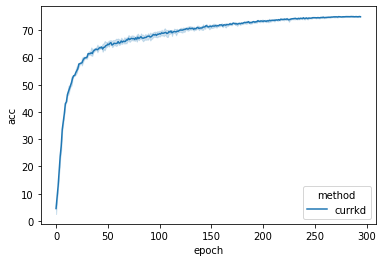

In [10]:
sns.lineplot(data=df_currkd_hundred, x='epoch', y='acc', hue='method')

Main result for noisy teacher

In [11]:
res_dict = {
    'method': ['teacher', 'teacher', 'currkd', 'currkd', 'cmi', 'cmi', 'dafl', 'dafl', 'deepinv', 'deepinv'],
    'acc': [95.70, 94.07, 95.02, 93.34, 94.84, 92.36, 92.22, 88.86, 93.26, 88.95],
    'type': ['good', 'noisy', 'good', 'noisy','good', 'noisy','good', 'noisy','good', 'noisy'],
}

noisy_df = pd.DataFrame(data=res_dict)
noisy_df

,method,acc,type
0,teacher,95.70,good
1,teacher,94.07,noisy
2,currkd,95.02,good
3,currkd,93.34,noisy
4,cmi,94.84,good
5,cmi,92.36,noisy
6,dafl,92.22,good
7,dafl,88.86,noisy
8,deepinv,93.26,good
9,deepinv,88.95,noisy


Text(0, 0.5, 'Top1 accuracy')

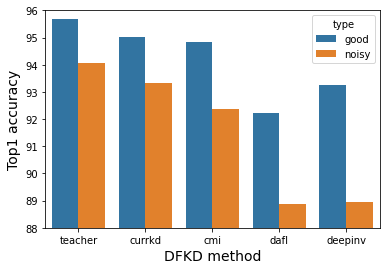

In [12]:
fig = sns.barplot(data=noisy_df, x='method', y='acc', hue='type')
fig.set_ylim(88, 96)
fig.set_xlabel('DFKD method', fontsize=14)
fig.set_ylabel('Top1 accuracy', fontsize=14)

In [13]:
curriculum_dict={
    'method': ['teacher', 'None', 'hard', 'soft', 'log'],
    'accuracy': [94.07, 92.07, 92.35, 92.42, 93.34],
    'model': ['currkd','currkd','currkd','currkd','currkd']
}
curr_df = pd.DataFrame(curriculum_dict)
curr_df

,method,accuracy,model
0,teacher,94.07,currkd
1,None,92.07,currkd
2,hard,92.35,currkd
3,soft,92.42,currkd
4,log,93.34,currkd


<ipython-input-14-77d65c857047>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.set_yticklabels(y_ticks, fontsize=12)


[Text(0, 92.0, '92.0'),
 Text(0, 92.5, '92.5'),
 Text(0, 93.0, '93.0'),
 Text(0, 93.5, '93.5'),
 Text(0, 94.0, '94.0'),
 Text(0, 94.5, '')]

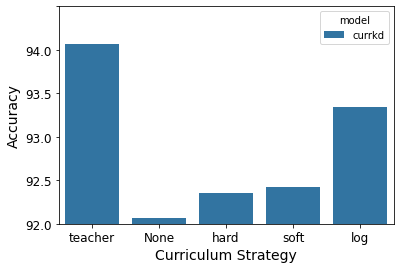

In [14]:
fig = sns.barplot(data=curr_df, x='method', y='accuracy', hue='model')
x_ticks = curriculum_dict['method']
y_ticks = np.arange(92, 94.5, 0.5)
fig.set_ylim(92, 94.5)
fig.set_xlabel('Curriculum Strategy', fontsize=14)
fig.set_ylabel('Accuracy', fontsize=14)
fig.set_xticklabels(x_ticks, fontsize=12)
fig.set_yticklabels(y_ticks, fontsize=12)

In [15]:
lambda_0_dict = {
    'lambda_0': [2, 2.2, 2.5, 2.8],
    'accuracy': [93.34,93.24,93.17,93.10],
    'curriculum': ['logarithm', 'logarithm', 'logarithm', 'logarithm']
}

lambda_df = pd.DataFrame(data=lambda_0_dict)
lambda_df

,lambda_0,accuracy,curriculum
0,2.0,93.34,logarithm
1,2.2,93.24,logarithm
2,2.5,93.17,logarithm
3,2.8,93.10,logarithm


([<matplotlib.axis.YTick at 0x7feb5ce29e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

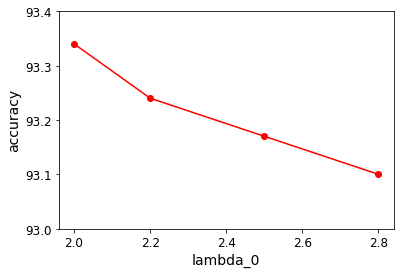

In [16]:
import matplotlib.pyplot as plt
plt.plot(lambda_0_dict['lambda_0'], lambda_0_dict['accuracy'], '-ro')
plt.ylim(93, 93.4)
x_ticks = np.arange(2, 3, 0.2)
y_ticks = np.arange(93, 93.4, 0.1)
plt.xlabel('lambda_0', fontsize=14)
plt.ylabel('accuracy', fontsize=14)
plt.xticks(x_ticks, fontsize=12)
plt.yticks(y_ticks, fontsize=12)

In [17]:
grad_adv_dict = {
    'begin': [0.17, 0.17, 0.20, 0.20, 0.25],
    'end': [0.67, 0.75, 0.67, 0.75, 0.67],
    'accuracy':[70.30, 70.15, 70.46, 70.58, 70.44],
}

grad_adv_df = pd.DataFrame(grad_adv_dict)
grad_adv_df

,begin,end,accuracy
0,0.17,0.67,70.30
1,0.17,0.75,70.15
2,0.20,0.67,70.46
3,0.20,0.75,70.58
4,0.25,0.67,70.44


In [39]:
b = np.array(list(res_dict_cifar100.values()))
print(np.mean(b))

68.8198


In [24]:
import pandas as pd
datas = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in res_dict.items()]))
datas.head()

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,27.68,51.5,69.62,76.56,79.06,83.16,82.97,85.35,84.97,86.05,...,95.03,95.05,95.0,94.99,95.01,94.99,95.01,90.59,71.57,43.06
